# **Car price prediction**

In [3]:
# STEP 0: import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#apis
from sklearn.impute import SimpleImputer
#modules

from sklearn.preprocessing import StandardScaler

#normal lib
from statistics import mean
import joblib
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
# models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.neural_network import MLPRegressor

# **STEP 1. LOOK AT THE BIG PICTURE**


# **Step 2. GET THE DATA**


In [4]:
raw_data = pd.read_csv(r'car_price_prediction.csv')

# **Step 3.EDA**

## 3.1. Data Cleanup

In [5]:
#data cleanup
print("Null values: ")
print(raw_data.isnull().sum())


Null values: 
ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


In [6]:
#duplicae rows
print("Duplicate rows: ")

duplicate_rows = raw_data[raw_data.duplicated()]
print(duplicate_rows)

Duplicate rows: 
             ID  Price  Levy   Manufacturer        Model  Prod. year  \
425    45815372   7840     -  MERCEDES-BENZ        E 200        1998   
1581   45815363   8781     -         TOYOTA          Ist        2002   
1697   45732125  18503     -         TOYOTA        Prius        2010   
1972   45507765  20385     -  MERCEDES-BENZ      CLS 500        2005   
2131   45815363   8781     -         TOYOTA          Ist        2002   
...         ...    ...   ...            ...          ...         ...   
18974  45815465   2352  1273          LEXUS       IS 350        2015   
19137  45810466  15125   642      CHEVROLET      Orlando        2012   
19200  45725908  36065   640  MERCEDES-BENZ  CLA 250 AMG        2013   
19203  45761487  13485   645         TOYOTA        Prius        2011   
19210  45732939   8311   642        HYUNDAI       Sonata        2012   

        Category Leather interior Fuel type Engine volume    Mileage  \
425        Sedan               No       CNG   

In [7]:
# Remove duplicate rows
raw_data = raw_data.drop_duplicates()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

In [8]:
#drop the ID column (EDIT GENERAL)
raw_data = raw_data.drop(columns = "ID")

In [9]:
# EDIT GENERAL
raw_data['Levy'] = raw_data['Levy'].replace('-', 0) # set into mean when cell = 0
raw_data['Levy'] = pd.to_numeric(raw_data['Levy'])

In [10]:
from sklearn.impute import KNNImputer

# Replace the missing values in Levy with knn imputer
impute = KNNImputer(n_neighbors=5)
raw_data['Levy'] = impute.fit_transform(raw_data['Levy'].values.reshape(-1,1))
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  object 
 9   Mileage           18924 non-null  object 
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64  
dty

In [11]:
#production year to be a string (EDIT GENERAL)
raw_data['Doors'] = raw_data['Doors'].str.replace('May', '5')
raw_data['Doors'] = raw_data['Doors'].str.replace('Mar', '3')
raw_data['Doors'] = raw_data['Doors'].str.replace('04', '4')
raw_data['Doors'] = raw_data['Doors'].str.replace('02', '2')

In [12]:
# extracting the enginer volume (EDIT GENREAL)
raw_data['Turbo'] = raw_data['Engine volume'].apply(lambda x: 1 if 'Turbo' in x else 0)
raw_data['Turbo'] = raw_data['Turbo'].map({1: 'Yes', 0: 'No'})

raw_data['Engine volume'] = raw_data['Engine volume'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

In [13]:
#reformat data (EDIT GENERAL)
#cleaning the mileague
raw_data['Mileage'] = raw_data['Mileage'].str.extract('(\d+)').astype(float)

In [14]:
raw_data['Age'] = 2024 - raw_data['Prod. year']

# Assuming raw_data is your DataFrame
raw_data = raw_data.drop(columns=['Prod. year'])


In [15]:
raw_data['Doors'] = raw_data['Doors'].astype('category')

In [16]:
print("Head: ")
print(raw_data.head())
print("Data insight: ")
raw_data.describe()

Head: 
   Price    Levy Manufacturer    Model   Category Leather interior Fuel type  \
0  13328  1399.0        LEXUS   RX 450       Jeep              Yes    Hybrid   
1  16621  1018.0    CHEVROLET  Equinox       Jeep               No    Petrol   
2   8467     0.0        HONDA      FIT  Hatchback               No    Petrol   
3   3607   862.0         FORD   Escape       Jeep              Yes    Hybrid   
4  11726   446.0        HONDA      FIT  Hatchback              Yes    Petrol   

   Engine volume   Mileage  Cylinders Gear box type Drive wheels Doors  \
0            3.5  186005.0        6.0     Automatic          4x4   4-5   
1            3.0  192000.0        6.0     Tiptronic          4x4   4-5   
2            1.3  200000.0        4.0      Variator        Front   4-5   
3            2.5  168966.0        4.0     Automatic          4x4   4-5   
4            1.3   91901.0        4.0     Automatic        Front   4-5   

              Wheel   Color  Airbags Turbo  Age  
0        Left whe

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age
count,1.892400e+04,18924.000000,18924.000000,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,1.858744e+04,632.886493,2.306251,1.555373e+06,4.580216,6.568379,13.085764
std,1.921356e+05,568.273736,0.877591,4.880221e+07,1.200223,4.322323,5.665749
min,1.000000e+00,0.000000,0.000000,0.000000e+00,1.000000,0.000000,4.000000
25%,5.331000e+03,0.000000,1.800000,7.019575e+04,4.000000,4.000000,9.000000
50%,1.317200e+04,642.000000,2.000000,1.264000e+05,4.000000,6.000000,12.000000
75%,2.206300e+04,917.000000,2.500000,1.891198e+05,4.000000,12.000000,15.000000
max,2.630750e+07,11714.000000,20.000000,2.147484e+09,16.000000,16.000000,85.000000


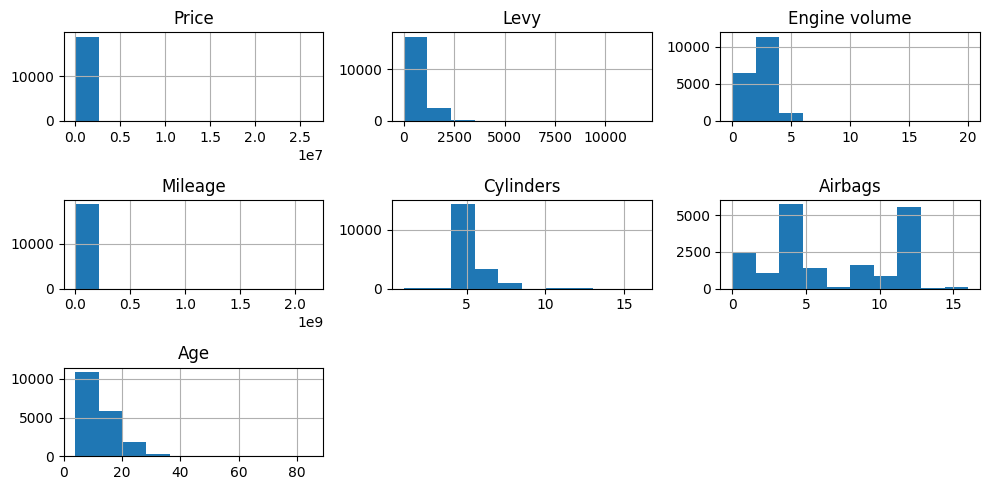

In [17]:
raw_data.hist(figsize=(10,5)) #bins: no. of intervals
plt.tight_layout()
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10


In [18]:
# Check normality summary
def normality_sum(df):
    num_col = df.select_dtypes(include=[np.number]).columns

    result = []
    for col in num_col:
        skewness = df[col].skew()
        kurtosis = df[col].kurtosis()
        result.append({
            'Variable' : col,
            'Skewness' : skewness,
            'Kurtosis' : kurtosis,
            'Mean' : df[col].mean(),
            'Median' : df[col].median(),
            'Std Dev' : df[col].std(),
            'Potential Normal' : abs(skewness) <= 1 and abs(kurtosis) <= 3
        })

    return pd.DataFrame(result)

normality_df = normality_sum(raw_data.drop(['Price'], axis =1))
print("Summary")
print(normality_df)


Summary
        Variable   Skewness     Kurtosis          Mean    Median  \
0           Levy   2.403811    29.584415  6.328865e+02     642.0   
1  Engine volume   2.208051    19.555731  2.306251e+00       2.0   
2        Mileage  38.578517  1572.672121  1.555373e+06  126400.0   
3      Cylinders   2.107707     6.587165  4.580216e+00       4.0   
4        Airbags   0.086344    -1.332103  6.568379e+00       6.0   
5            Age   2.088595    11.450244  1.308576e+01      12.0   

        Std Dev  Potential Normal  
0  5.682737e+02             False  
1  8.775910e-01             False  
2  4.880221e+07             False  
3  1.200223e+00             False  
4  4.322323e+00              True  
5  5.665749e+00             False  


# **Outlier**

In [19]:
def remove_outliers_iqr(data, factor=1.5):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    iqr = Q3 - Q1
    lower_bound = Q1 - factor * iqr
    upper_bound = Q3 + factor * iqr
    return lower_bound, upper_bound

lower_bound, upper_bound = remove_outliers_iqr(raw_data['Price'], factor=1.5)
price_column = raw_data['Price']

outliers = (price_column < lower_bound) | (price_column > upper_bound)

# Count and print the number of outliers
num_outliers = np.sum(outliers)
print(f'Number of outliers: {num_outliers}')

# Remove outliers from the DataFrame
raw_data = raw_data[~outliers]


Number of outliers: 1055


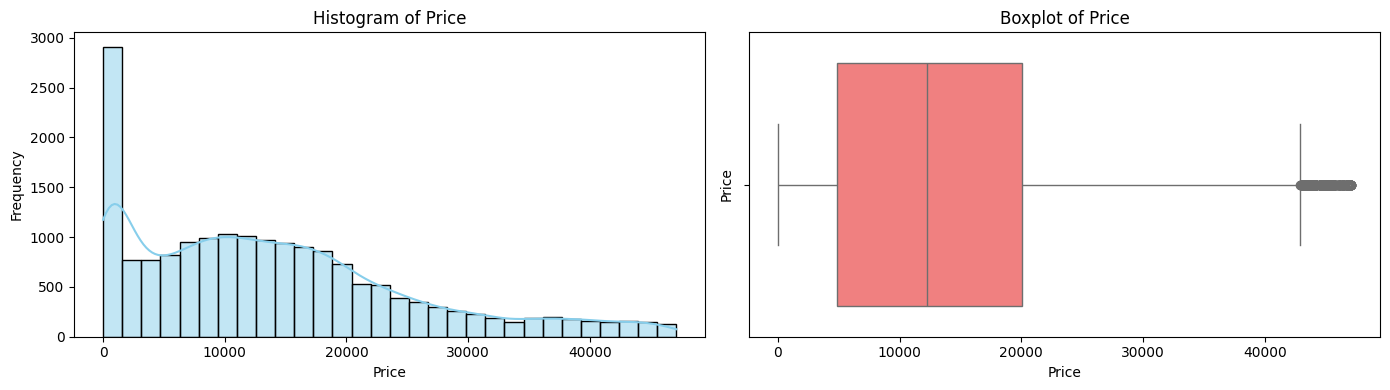

In [20]:
# Set up a 1x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Histogram
sns.histplot(raw_data['Price'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=raw_data['Price'], color='lightcoral', ax=axes[1], boxprops=dict(facecolor='lightcoral'))
axes[1].set_title('Boxplot of Price')
axes[1].set_ylabel('Price')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
# List of columns to check for outliers
columns_to_check = ['Levy', 'Engine volume', 'Mileage','Cylinders']# Not including Airbags since distro seems normal

# Dictionary to store outlier counts
outlier_counts = {}

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the threshold for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find and count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = outliers.shape[0]

    # Remove outliers from the DataFrame
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_cleaned, outlier_count

raw_data = raw_data[raw_data['Price'] >= 500]

# Iterate over columns, remove outliers, and store counts
for column in columns_to_check:
    raw_data, count = remove_outliers_iqr(raw_data, column)
    outlier_counts[column] = count

# Display outlier counts
print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count}")

Outlier Counts:
Levy: 122
Engine volume: 698
Mileage: 610
Cylinders: 2905


In [22]:
raw_data.info() # after removal


<class 'pandas.core.frame.DataFrame'>
Index: 11901 entries, 2 to 19235
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             11901 non-null  int64   
 1   Levy              11901 non-null  float64 
 2   Manufacturer      11901 non-null  object  
 3   Model             11901 non-null  object  
 4   Category          11901 non-null  object  
 5   Leather interior  11901 non-null  object  
 6   Fuel type         11901 non-null  object  
 7   Engine volume     11901 non-null  float64 
 8   Mileage           11901 non-null  float64 
 9   Cylinders         11901 non-null  float64 
 10  Gear box type     11901 non-null  object  
 11  Drive wheels      11901 non-null  object  
 12  Doors             11901 non-null  category
 13  Wheel             11901 non-null  object  
 14  Color             11901 non-null  object  
 15  Airbags           11901 non-null  int64   
 16  Turbo             11901 non

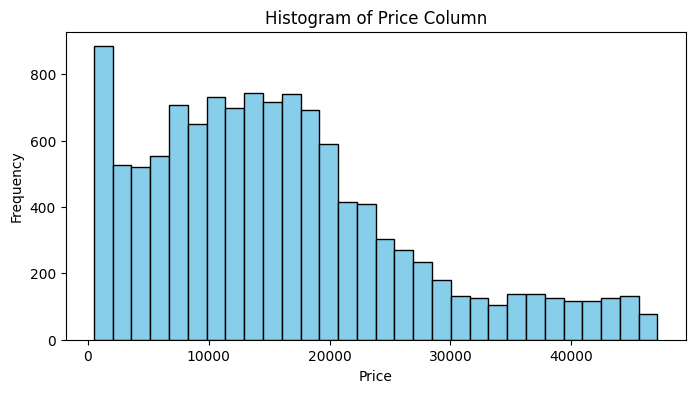

In [23]:
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame
plt.figure(figsize=(8, 4))
plt.hist(raw_data['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Price Column')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

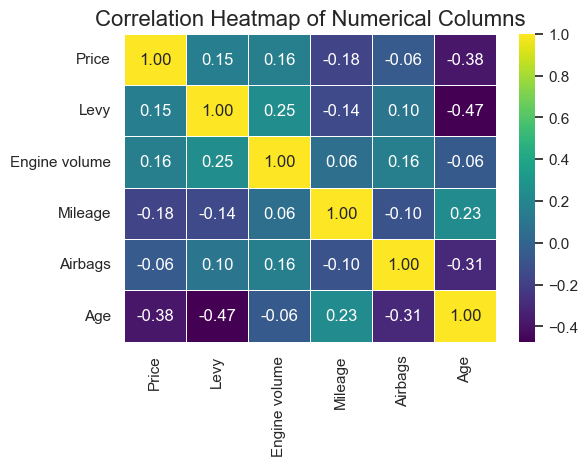

In [24]:
# Select only numerical columns with int64 and float64 data types excluding 'Cylinders'
numerical_columns = raw_data.select_dtypes(include=['int64', 'float64']).drop(columns=['Cylinders'], errors='ignore')

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up Seaborn style
sns.set(style="white")

# Create a heatmap using Seaborn with a different colormap ('viridis')
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)

# Add title
plt.title('Correlation Heatmap of Numerical Columns', fontsize=16)

# Show the plot
plt.show()


## **Outlier**
THIS IS SAMPLE, REMEMBER TO PARAPHARSE
Leaveoneout encoding for Manufacturer, Model and Category. Rest is one hot encoded

Leave-One-Out Encoding (LOO Encoding) is a technique used in feature engineering for categorical variables, particularly in the context of supervised machine learning. It involves encoding categorical variables by calculating the mean of the target variable for each category, excluding the current instance being encoded. The process is as follows:

For each instance in a category, compute the mean of the target variable for all other instances in the same category. Replace the original categorical value with the computed mean for that instance. This technique aims to provide a more robust encoding by avoiding data leakage, as it calculates the mean by excluding the target value of the instance being encoded.

Advantages of Leave-One-Out Encoding:

Reduced Data Leakage:

LOO Encoding is designed to mitigate data leakage issues that can arise in target encoding, especially when there is a risk of overfitting to the target variable.

Preservation of Information:

By excluding the target value of the instance being encoded, LOO Encoding attempts to provide an unbiased estimate of the category's impact on the target variable.

Effective for Low Cardinality:

Particularly useful for categorical variables with low cardinality, where the number of instances in a category is limited.

Adaptability:

LOO Encoding can be adapted to different models and is applicable in various supervised learning scenarios.

Avoidance of Overfitting:

When used cautiously, LOO Encoding can help avoid overfitting to the target variable by providing a more general encoding strategy.

In [25]:
from category_encoders import LeaveOneOutEncoder

# Select the columns to be encoded
columns_to_encode = ['Manufacturer', 'Model', 'Category']

# Initialize the LeaveOneOutEncoder
encoder = LeaveOneOutEncoder(cols=columns_to_encode)

# Fit and transform the entire DataFrame
raw_data_encoded = encoder.fit_transform(raw_data[columns_to_encode], raw_data['Price'])

# Concatenate the encoded columns with the original DataFrame
raw_data = pd.concat([raw_data, raw_data_encoded.add_suffix('_LOO')], axis=1)

In [26]:
raw_data.drop(columns=['Manufacturer', 'Model', 'Category'], inplace=True)

# Identify columns with datatype 'object' or 'category'
columns_to_encode = raw_data.select_dtypes(include=['object', 'category']).columns

# Perform one-hot encoding with drop_first=True
raw_data_encoded = pd.get_dummies(raw_data, columns=columns_to_encode, drop_first=True)

raw_data_encoded


,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age,Manufacturer_LOO,Model_LOO,Category_LOO,...,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Turbo_Yes
2,8467,0.0,1.3,200000.0,4.0,2,18,12908.312586,13558.956395,12636.230938,...,False,False,False,False,False,False,False,False,False,False
3,3607,862.0,2.5,168966.0,4.0,0,13,14027.698210,12633.530864,21872.319108,...,False,False,False,False,False,False,False,True,False,False
4,11726,446.0,1.3,91901.0,4.0,4,10,12903.804979,13549.482558,12634.802805,...,False,False,False,False,False,True,False,False,False,False
5,39493,891.0,2.0,160931.0,4.0,4,8,20770.377333,30799.427326,21858.522107,...,False,False,False,False,False,False,False,True,False,False
6,1803,761.0,1.8,258909.0,4.0,12,14,14795.485371,13776.765777,12639.151183,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19225,8781,1107.0,1.7,236000.0,4.0,4,17,6978.162857,7620.406250,10121.333333,...,False,False,False,False,False,False,False,False,False,True
19232,8467,0.0,2.0,300000.0,4.0,5,25,15739.663244,7682.166667,14978.434783,...,False,False,False,False,False,True,False,False,False,True
19233,15681,831.0,2.4,161600.0,4.0,8,13,20778.457414,13670.366306,13961.476260,...,False,False,False,False,True,False,False,False,False,False
19234,26108,836.0,2.0,116365.0,4.0,4,14,20774.919240,27981.279778,21863.668205,...,True,False,False,False,False,False,False,False,False,False


In [27]:
# Loop through columns
for column in raw_data_encoded.columns:
    # Check if the column contains boolean values (True/False)
    if raw_data_encoded[column].dtype == bool:
        # Replace True with 1 and False with 0
        raw_data_encoded[column] = raw_data_encoded[column].astype(int)

raw_data_encoded



,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age,Manufacturer_LOO,Model_LOO,Category_LOO,...,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Turbo_Yes
2,8467,0.0,1.3,200000.0,4.0,2,18,12908.312586,13558.956395,12636.230938,...,0,0,0,0,0,0,0,0,0,0
3,3607,862.0,2.5,168966.0,4.0,0,13,14027.698210,12633.530864,21872.319108,...,0,0,0,0,0,0,0,1,0,0
4,11726,446.0,1.3,91901.0,4.0,4,10,12903.804979,13549.482558,12634.802805,...,0,0,0,0,0,1,0,0,0,0
5,39493,891.0,2.0,160931.0,4.0,4,8,20770.377333,30799.427326,21858.522107,...,0,0,0,0,0,0,0,1,0,0
6,1803,761.0,1.8,258909.0,4.0,12,14,14795.485371,13776.765777,12639.151183,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19225,8781,1107.0,1.7,236000.0,4.0,4,17,6978.162857,7620.406250,10121.333333,...,0,0,0,0,0,0,0,0,0,1
19232,8467,0.0,2.0,300000.0,4.0,5,25,15739.663244,7682.166667,14978.434783,...,0,0,0,0,0,1,0,0,0,1
19233,15681,831.0,2.4,161600.0,4.0,8,13,20778.457414,13670.366306,13961.476260,...,0,0,0,0,1,0,0,0,0,0
19234,26108,836.0,2.0,116365.0,4.0,4,14,20774.919240,27981.279778,21863.668205,...,1,0,0,0,0,0,0,0,0,0


# Data Preparation

## Helper Functions

In [29]:
from sklearn.metrics import mean_squared_error

def r2score_and_rmse(model, train_data, labels):
    r2score = model.score(train_data, labels)
    prediction = model.predict(train_data)
    mse = mean_squared_error(labels, prediction)
    rmse = np.sqrt(mse)
    return r2score, rmse

def store_model(model, model_name=""):
    if model_name == "":
        model_name = type(model).__name__
    joblib.dump(model, 'models/' + model_name + '_model.pkl')

def load_model(model_name):
    model = joblib.load('models/' + model_name + '_model.pkl')

    return model

In [30]:
from sklearn.model_selection import train_test_split

# Separate the target variable (Price) and independent variables
X = raw_data_encoded.drop(columns=['Price','Cylinders'])
y = raw_data_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
X_test_scaled = scaler.transform(X_test)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(8330, 38)
(8330,)
(3571, 38)
(3571,)


# Model Training

## Linear Regression

In [37]:
new_training = 1  

if new_training: 
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Calculate R2 score and RMSE
    r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
    r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)
    store_model(model, model_name="LinearRegression")
else:
    model = load_model("LinearRegression")

# Analyze performance
print('_____________LINEAR REGRESSION MODEL PERFORMANCE_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)
print('\n R2 Score (test data):', r2score_test)
print('\n RMSE (test data):', rmse_test)

# Display some predictions and corresponding labels
print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_____________LINEAR REGRESSION MODEL PERFORMANCE_________

 R2 Score (train data): 0.5174912075814619

 RMSE (train data): 7534.5633780436865

 R2 Score (test data): 0.5044360798616402

 RMSE (test data): 7558.57263684927

Predictions:  [32883.9 10212.9 19295.6 19752.9 24849.  25508.9 29790.8 18769.5 27708. ]
Labels:       [45633, 6115, 31797, 21009, 21326, 13808, 40224, 22110, 21768]


## Ridge Regression

In [40]:
new_training = 1  

if new_training: 
    model = Ridge(alpha=0.1)
    model.fit(X_train_scaled, y_train)

    # Calculate R2 score and RMSE
    r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
    r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)
    store_model(model, model_name="Ridge")
else:
    model = load_model("Ridge")

# Analyze performance
print('_____________RIDGE MODEL PERFORMANCE_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)
print('\n R2 Score (test data):', r2score_test)
print('\n RMSE (test data):', rmse_test)

# Display some predictions and corresponding labels
print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_____________RIDGE MODEL PERFORMANCE_________

 R2 Score (train data): 0.517491206691813

 RMSE (train data): 7534.563384989794

 R2 Score (test data): 0.5044377542683518

 RMSE (test data): 7558.559867421422

Predictions:  [32883.7 10212.9 19295.5 19752.8 24848.8 25508.9 29790.7 18769.4 27708.1]
Labels:       [45633, 6115, 31797, 21009, 21326, 13808, 40224, 22110, 21768]


## Decision Tree

In [42]:
new_training = 1  

if new_training: 
    model = DecisionTreeRegressor()
    model.fit(X_train_scaled, y_train)

    # Calculate R2 score and RMSE
    r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
    r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)
    store_model(model, model_name="DecisionTreeRegressor")
else:
    model = load_model("DecisionTreeRegressor")

# Analyze performance
print('_____________DECISION TREE REGRESSOR PERFORMANCE_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)
print('\n R2 Score (test data):', r2score_test)
print('\n RMSE (test data):', rmse_test)

# Display some predictions and corresponding labels
print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_____________DECISION TREE REGRESSOR PERFORMANCE_________

 R2 Score (train data): 1.0

 RMSE (train data): 0.0

 R2 Score (test data): 0.9654499764145001

 RMSE (test data): 1995.7867046426709

Predictions:  [45633.  6115. 31797. 21009. 21326. 13808. 40224. 22110. 21768.]
Labels:       [45633, 6115, 31797, 21009, 21326, 13808, 40224, 22110, 21768]


## Random Forest

In [50]:
new_training = 1  

if new_training: 
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)

    # Calculate R2 score and RMSE
    r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
    r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)
    store_model(model, model_name="RandomForestRegressor")
else:
    model = load_model("RandomForestRegressor")

# Analyze performance
print('_____________RANDOM FOREST REGRESSOR PERFORMANCE_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)
print('\n R2 Score (test data):', r2score_test)
print('\n RMSE (test data):', rmse_test)

# Display some predictions and corresponding labels
print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_____________RANDOM FOREST REGRESSOR PERFORMANCE_________

 R2 Score (train data): 0.9974481375484021

 RMSE (train data): 547.9413878723101

 R2 Score (test data): 0.9834347377090751

 RMSE (test data): 1381.939751414915

Predictions:  [45624.2  6115.3 32586.4 21162.  21326.  13795.  40263.4 22062.7 21758.8]
Labels:       [45633, 6115, 31797, 21009, 21326, 13808, 40224, 22110, 21768]


## XGBoost

In [39]:
new_training = 1

if new_training:
  model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
  model.fit(X_train_scaled, y_train)
  store_model(model, model_name="XGBoost")
else:
  model = load_model("XGBoost")

r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)

print('_______SCORE FOR XGBOOST_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)
print('\n R2 Score (test data):', r2score_test)
print('\n RMSE (test data):', rmse_test)

print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_______SCORE FOR XGBOOST_________

 R2 Score (train data): 0.9984489679336548

 RMSE (train data): 427.1838164958757

 R2 Score (test data): 0.9637517333030701

 RMSE (test data): 2044.2479915504157

Predictions:  [45615.9  5869.4 32417.  21553.8 21302.  13528.8 40510.7 22565.3 22073.8]
Labels:       [45633, 6115, 31797, 21009, 21326, 13808, 40224, 22110, 21768]


## Neural Network

In [ ]:
new_training = 1

if new_training:
    # Define the neural network architecture
    model = MLPRegressor(
        hidden_layer_sizes=(500, 250, 125),
        activation='relu',
        solver='adam',
        alpha=0.001,  # L2 regularization
        batch_size=32,
        max_iter=30,
        early_stopping=True,
        n_iter_no_change=7,
        random_state=37,
        verbose=True
    )
    model.fit(X_train_scaled, y_train)
    store_model(model, model_name="NeuralNetwork")
else:
    model = load_model("NeuralNetwork")

r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)

print('_______SCORE FOR NEURAL NETWORK_________')
print('\nR2 score: ', r2score) 
print('RMSE score: ', rmse)
print('\n R2 Score (test data):', r2score_test)
print('\n RMSE (test data):', rmse_test)

print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

In [57]:
# Evaluation with K-Fold
print('\n____________ K-fold cross validation ____________')

run_new_evaluation = 1

if run_new_evaluation:
    cv = KFold(n_splits=10, shuffle=True, random_state=37)

    # DECISION TREE
    model_name = "DecisionTreeRegressor"
    model = DecisionTreeRegressor(random_state=42)
    predictions = cross_val_predict(model, X_train_scaled, y_train, cv=cv)

    # Calculate RMSE and R²
    rmse = np.sqrt(mean_squared_error(y_train, predictions))
    r2 = r2_score(y_train, predictions)
    
    joblib.dump(rmse, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'DecisionTreeRegressor RMSE: {rmse:.2f}')
    print(f'DecisionTreeRegressor R²: {r2:.2f}\n')

    # RANDOM FOREST
    model_name = "RandomForest"
    model = RandomForestRegressor(random_state=42)
    predictions = cross_val_predict(model, X_train_scaled, y_train, cv=cv)

    rmse = np.sqrt(mean_squared_error(y_train, predictions))
    r2 = r2_score(y_train, predictions)
    
    joblib.dump(rmse, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'RandomForest RMSE: {rmse:.2f}')
    print(f'RandomForest R²: {r2:.2f}\n')

    # RIDGE
    model_name = "Ridge"
    model = Ridge(alpha=0.1)
    predictions = cross_val_predict(model, X_train_scaled, y_train, cv=cv)

    rmse = np.sqrt(mean_squared_error(y_train, predictions))
    r2 = r2_score(y_train, predictions)

    joblib.dump(rmse, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'Ridge RMSE: {rmse:.2f}')
    print(f'Ridge R²: {r2:.2f}\n')

    # LINEAR
    model_name = "Linear"
    model = LinearRegression()
    predictions = cross_val_predict(model, X_train_scaled, y_train, cv=cv)

    rmse = np.sqrt(mean_squared_error(y_train, predictions))
    r2 = r2_score(y_train, predictions)

    joblib.dump(rmse, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'Linear RMSE: {rmse:.2f}')
    print(f'Linear R²: {r2:.2f}\n')

    # XGBOOST
    model_name = "XGBoost"
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    predictions = cross_val_predict(model, X_train_scaled, y_train, cv=cv)

    rmse = np.sqrt(mean_squared_error(y_train, predictions))
    r2 = r2_score(y_train, predictions)

    joblib.dump(rmse, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'XGBoost RMSE: {rmse:.2f}')
    print(f'XGBoost R²: {r2:.2f}\n')

    # NEURAL NETWORK
    # model_name = "NeuralNetwork"
    # model = MLPRegressor(
    #     hidden_layer_sizes=(500, 250, 125),
    #     activation='relu',
    #     solver='adam',
    #     alpha=0.001,  # L2 regularization term
    #     batch_size=32,
    #     max_iter=30, 
    #     early_stopping=True,
    #     n_iter_no_change=7,
    #     random_state=37,
    #     verbose=True
    # )
    # predictions = cross_val_predict(model, X_train_scaled, y_train, cv=cv)

    # rmse = np.sqrt(mean_squared_error(y_train, predictions))
    # r2 = r2_score(y_train, predictions)

    # joblib.dump(rmse, 'saved_objects/' + model_name + '_rmse.pkl')
    # joblib.dump(r2, 'saved_objects/' + model_name + '_r2.pkl')

    # print(f'NeuralNetwork RMSE: {rmse:.2f}')
    # print(f'NeuralNetwork R²: {r2:.2f}\n')

else:
    # Load saved RMSE and R² scores for each model
    models = ["DecisionTreeRegressor", "RandomForest", "Ridge", "Linear", "XGBoost", "NeuralNetwork"]

    for model_name in models:
        rmse_scores = joblib.load('saved_objects/' + model_name + '_rmse.pkl')
        r2_scores = joblib.load('saved_objects/' + model_name + '_r2.pkl')
        print(f"\n{model_name} RMSE: {rmse_scores:.2f}")
        print(f"{model_name} R²: {r2_scores:.2f}\n")



____________ K-fold cross validation ____________
DecisionTreeRegressor RMSE: 2015.04
DecisionTreeRegressor R²: 0.97

RandomForest RMSE: 1544.66
RandomForest R²: 0.98

Ridge RMSE: 7568.78
Ridge R²: 0.51

Linear RMSE: 7568.78
Linear R²: 0.51

XGBoost RMSE: 1719.77
XGBoost R²: 0.97



In [55]:
from sklearn.model_selection import GridSearchCV

# Adjust the param_grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 150, 200],       # Number of trees
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]             # Whether bootstrap samples are used when building trees
}

# Initialize the RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the grid search model on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse}")


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'bootstrap': True, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Test RMSE: 1382.4670496786582
